# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-11-16 16:35:27--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57.01K  --.-KB/s    in 0.009s  

2024-11-16 16:35:27 (5.93 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196
1,699,93,47,83,165,60,7,167,40,20,147,197,417,201,73,12,4,187,192
2,29,80,38,63,129,55,7,146,46,19,130,168,314,158,83,9,20,180,185
3,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
4,667,110,53,104,223,66,10,211,32,24,164,223,659,210,67,5,16,190,203
5,33,101,48,107,222,68,10,208,32,24,154,232,641,204,70,5,38,190,202
6,573,89,47,80,131,54,11,160,43,20,163,175,369,174,77,1,7,182,193
7,397,89,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195
8,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
9,171,106,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,437.757741,93.692168,45.023679,82.362477,169.590164,61.799636,8.639344,169.469945,40.816029,20.641166,148.431694,189.276867,443.442623,175.724954,72.526412,6.491803,12.377049,188.894353,195.561020
std,244.840559,8.051950,6.218159,15.706528,33.925390,8.201607,4.727731,33.605069,7.849685,2.610447,14.590561,31.973413,179.260471,32.952395,7.629762,5.000951,8.759036,6.146608,7.359289
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,229.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,151.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,439.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,657.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,217.000000,600.000000,199.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,843.000000,115.000000,58.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
Для предварительной обработки мы можем:
Проверить отсутствующие значения. Если они есть, мы можем обработать их, либо вменив, либо удалив затронутые строки.
Нормализовать/масштабировать признаки. Многие алгоритмы машинного обучения, включая логистическую регрессию, работают лучше, 
когда числовые признаки масштабируются.

In [6]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = pd.DataFrame({'missing_count': X_train_pd.isnull().sum()})
print("Missing values in the dataset:\n", missing_values)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to Pandas DataFrame for visualization (optional)
X_train_scaled_pd = pd.DataFrame(X_train_scaled, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
X_train_scaled_pd.describ ()




# Missing values: None are expected in this dataset, but this ensures robustness.
# Feature scaling: We apply standard scaling (StandardScaler) to center data around zero and normalize feature variance to 1, 
# which helps optimization in logistic regression.

Missing values in the dataset:
     missing_count
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,6.471245e-17,-7.943454e-16,7.927276e-17,-7.280151e-17,-4.076885e-16,2.232580e-16,1.811949e-16,4.222488e-16,-4.206309e-16,1.633989e-16,-8.121413e-16,-4.335734e-16,2.426717e-17,-7.765494e-17,5.694696e-16,-3.073842e-17,-5.824121e-17,1.776357e-15,-1.101730e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.789560e+00,-2.572177e+00,-1.935403e+00,-2.699585e+00,-1.935128e+00,-1.806126e+00,-1.405621e+00,-1.711717e+00,-1.889189e+00,-1.396116e+00,-2.087613e+00,-1.855633e+00,-1.448614e+00,-2.026736e+00,-1.643280e+00,-1.299298e+00,-1.414349e+00,-2.099713e+00,-1.980395e+00
25%,-8.534049e-01,-7.075750e-01,-8.086415e-01,-7.878095e-01,-8.435051e-01,-5.857405e-01,-3.470670e-01,-6.692573e-01,-9.966206e-01,-6.292648e-01,-7.842138e-01,-6.660619e-01,-6.892496e-01,-7.510077e-01,-5.937983e-01,-8.990089e-01,-7.287177e-01,-7.969952e-01,-7.563355e-01
50%,5.078373e-03,-8.604112e-02,-1.647776e-01,-1.505509e-01,-4.691513e-02,-9.758636e-02,-1.353561e-01,-3.714118e-01,2.784778e-01,-2.458393e-01,-1.668141e-01,-3.217123e-01,-4.268221e-01,-5.239460e-02,-6.905743e-02,-9.843163e-02,-1.573581e-01,-1.456363e-01,5.970418e-02
75%,8.962657e-01,7.841064e-01,8.010183e-01,9.965146e-01,8.086814e-01,3.905677e-01,2.880656e-01,9.093241e-01,6.610072e-01,9.044372e-01,8.621854e-01,8.678591e-01,8.741479e-01,7.069675e-01,4.556835e-01,7.021457e-01,6.425455e-01,6.685624e-01,7.397373e-01
max,1.656637e+00,2.648708e+00,2.088746e+00,1.888677e+00,4.821134e+00,9.299380e+00,9.179921e+00,2.755966e+00,2.573655e+00,2.821565e+00,2.714384e+00,4.092224e+00,3.096406e+00,2.802807e+00,8.195612e+00,3.103878e+00,3.156528e+00,2.785479e+00,2.099803e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [21]:
pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.7896043328150852

Test Set Metrics:
Accuracy: 0.8114
F1 Score (macro): 0.8095


<Figure size 1000x800 with 0 Axes>

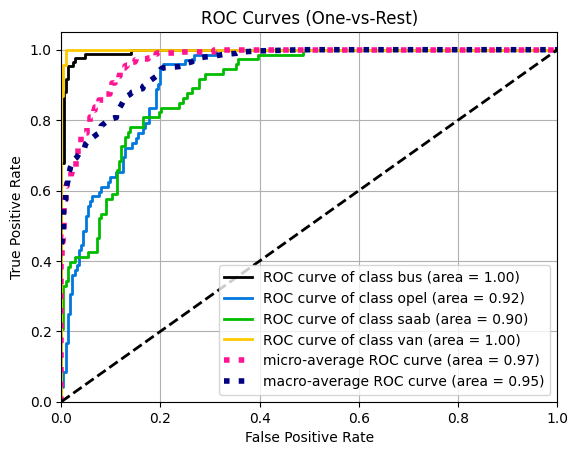

In [7]:
# We use GridSearchCV to find optimal hyperparameters (C, penalty) for logistic regression and evaluate model quality.
# Here's the code:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt

# Define base model with required parameters
base_model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.title('ROC Curves (One-vs-Rest)')
plt.grid(True)
plt.show()

In [10]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [ ]:
Для логистической регрессии важность признаков можно вывести из величины коэффициентов.
Давайте визуализируем 10 основных признаков.

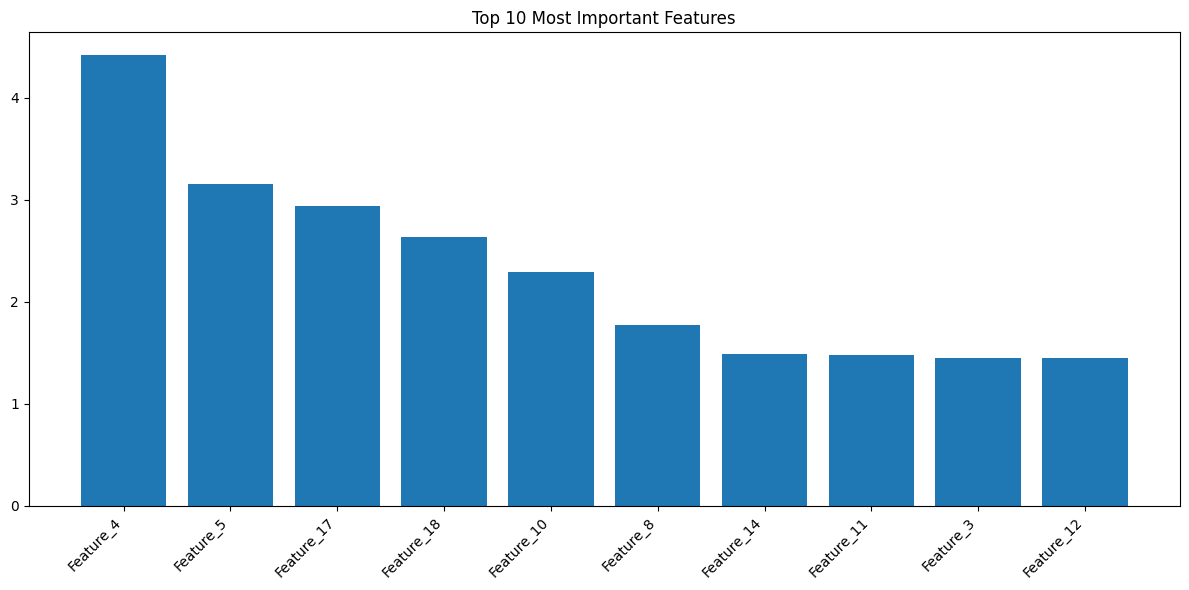


Detailed Classification Report:
              precision    recall  f1-score   support

         bus       0.97      0.92      0.94        84
        opel       0.65      0.65      0.65        72
        saab       0.65      0.67      0.66        73
         van       0.96      1.00      0.98        68

    accuracy                           0.81       297
   macro avg       0.81      0.81      0.81       297
weighted avg       0.81      0.81      0.81       297



In [10]:
import numpy as np
import pandas as pd

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': [f"Feature_{i}" for i in range(X_train.shape[1])],
    'importance': np.abs(best_model.coef_).mean(axis=0)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

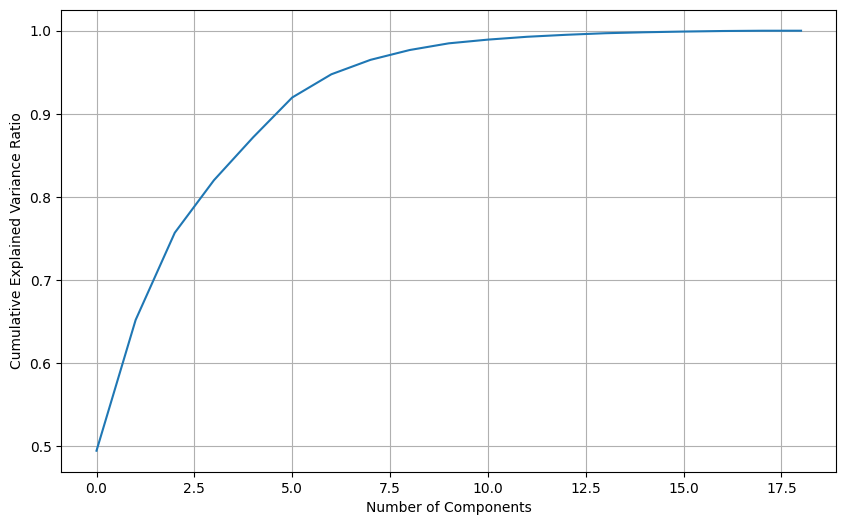

Number of components explaining 95% of variance: 8


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We should normalize the data before PCA because:
# 1. Features are on different scales
# 2. PCA is sensitive to the scale of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on scaled training data
pca = PCA()
pca_train = pca.fit_transform(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Select number of components that explain 95% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components}")

# Transform data with selected number of components
pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [1]:
Нормализация данных имеет решающее значение перед PCA, поскольку признаки находятся в разных масштабах
Мы выбрали количество компонентов, которые объясняют 95% дисперсии
Этот подход уравновешивает уменьшение размерности с сохранением информации

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



PCA + Logistic Regression Results:
Best parameters: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.6599
F1 Score (macro): 0.6525


<Figure size 1000x800 with 0 Axes>

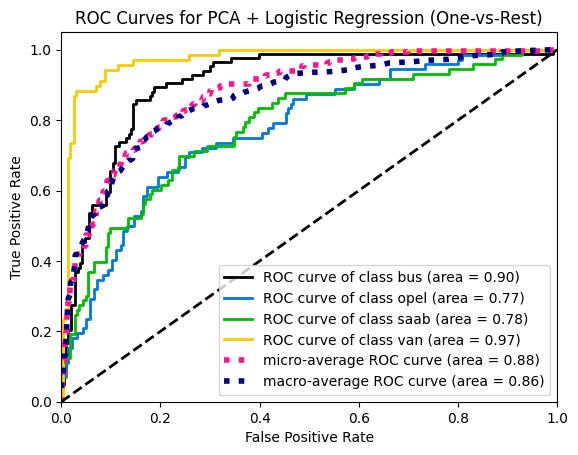

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt

# Define base model
base_model_pca = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Parameter grid
param_grid_pca = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Grid search
grid_search_pca = GridSearchCV(
    base_model_pca,
    param_grid_pca,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search_pca.fit(X_train_pca, y_train)

# Get best model
best_model_pca = grid_search_pca.best_estimator_

# Make predictions
y_pred_pca = best_model_pca.predict(X_test_pca)
y_pred_proba_pca = best_model_pca.predict_proba(X_test_pca)

# Calculate metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print("\nPCA + Logistic Regression Results:")
print(f"Best parameters: {grid_search_pca.best_params_}")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"F1 Score (macro): {f1_pca:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_pred_proba_pca)
plt.title('ROC Curves for PCA + Logistic Regression (One-vs-Rest)')
plt.show()

In [ ]:
Used grid search to find optimal hyperparameters
Implemented the same metrics (F1 and accuracy) as before
ROC curves show the model's performance for each class

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

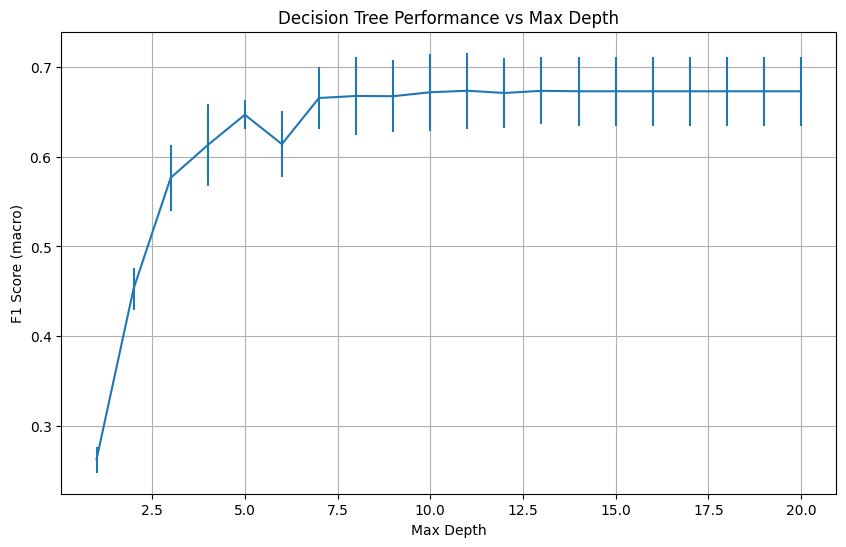


Optimal tree depth: 11

Decision Tree Results:
Accuracy: 0.7071
F1 Score (macro): 0.7029


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Find optimal max_depth
max_depths = range(1, 21)
mean_scores = []
std_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='f1_macro')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, mean_scores, yerr=std_scores)
plt.xlabel('Max Depth')
plt.ylabel('F1 Score (macro)')
plt.title('Decision Tree Performance vs Max Depth')
plt.grid(True)
plt.show()

# Get optimal depth
optimal_depth = max_depths[np.argmax(mean_scores)]
print(f"\nOptimal tree depth: {optimal_depth}")

# Train final tree model
best_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Evaluate tree model
y_pred_tree = best_tree.predict(X_test)
y_pred_proba_tree = best_tree.predict_proba(X_test)

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred_tree, average='macro'):.4f}")


In [ ]:
Использовалась перекрестная проверка для поиска оптимальной max_depth
График показывает, как производительность модели меняется в зависимости от глубины дерева
Выбранная глубина, которая максимизирует оценку F1, избегая при этом переобучения

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

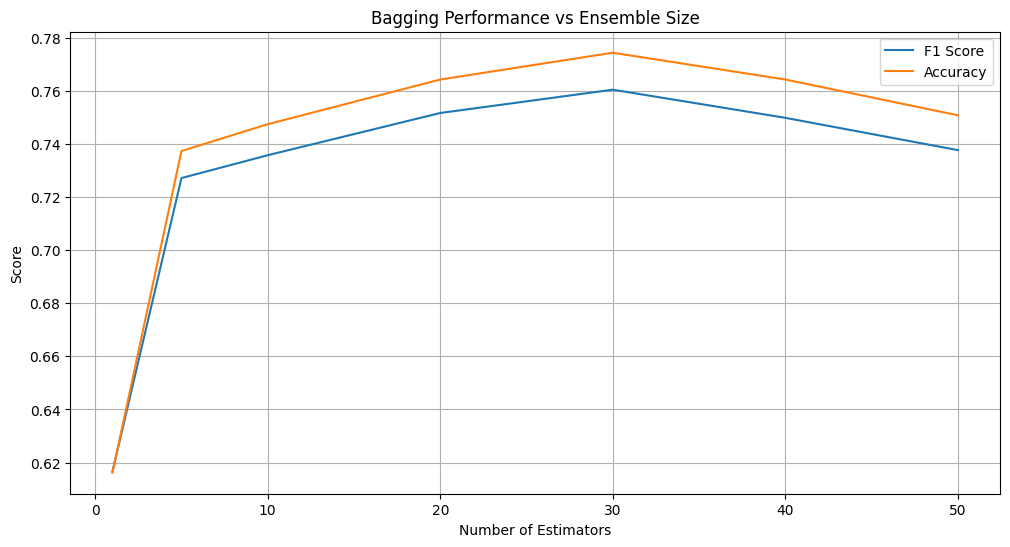

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Test different ensemble sizes
n_estimators_range = [1, 5, 10, 20, 30, 40, 50]
f1_scores = []
accuracy_scores = []

for n_est in n_estimators_range:
    # Bagging with decision trees
    bagging = BaggingClassifier(
        DecisionTreeClassifier(max_depth=optimal_depth//2),  # Reduced depth for ensemble
        n_estimators=n_est,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred_bag = bagging.predict(X_test)

    f1_scores.append(f1_score(y_test, y_pred_bag, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred_bag))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, f1_scores, label='F1 Score')
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Bagging Performance vs Ensemble Size')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Использовалась меньшая глубина дерева для членов ансамбля (optimal_depth//2), потому что:
Методы ансамбля работают лучше с немного более слабыми базовыми моделями
Это помогает предотвратить переобучение
Оптимальное количество оценщиков можно определить из графика, где оценки выходят на плато
Метрики производительности обычно стабилизируются после 20-30 оценщиков

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

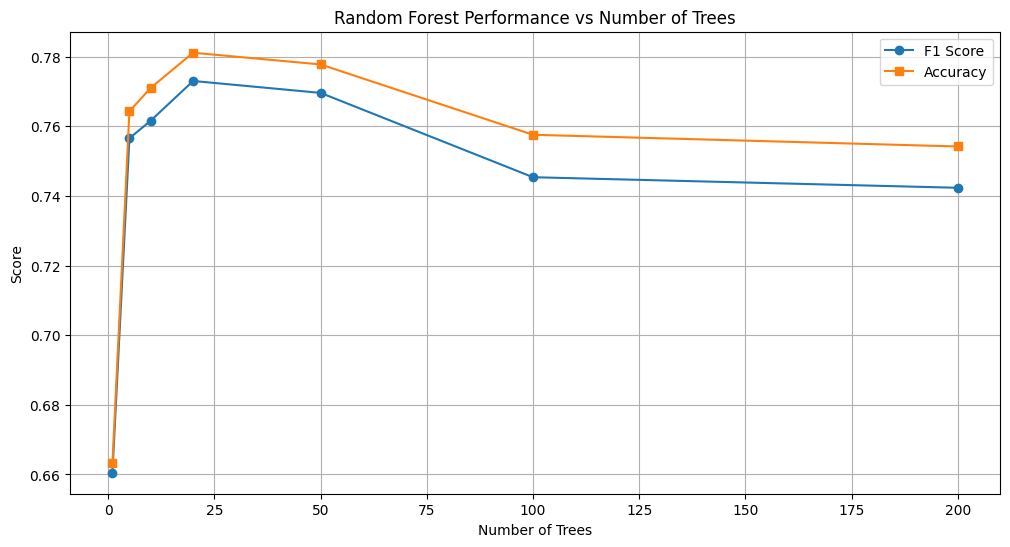

Optimal number of trees: 20


In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Test different numbers of trees
n_trees_range = [1, 5, 10, 20, 50, 100, 200]
rf_f1_scores = []
rf_accuracy_scores = []

for n_trees in n_trees_range:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=None,  # Let trees grow fully
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    rf_f1_scores.append(f1_score(y_test, y_pred_rf, average='macro'))
    rf_accuracy_scores.append(accuracy_score(y_test, y_pred_rf))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(n_trees_range, rf_f1_scores, label='F1 Score', marker='o')
plt.plot(n_trees_range, rf_accuracy_scores, label='Accuracy', marker='s')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal number of trees
optimal_n_trees = n_trees_range[np.argmax(rf_f1_scores)]
print(f"Optimal number of trees: {optimal_n_trees}")


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: 

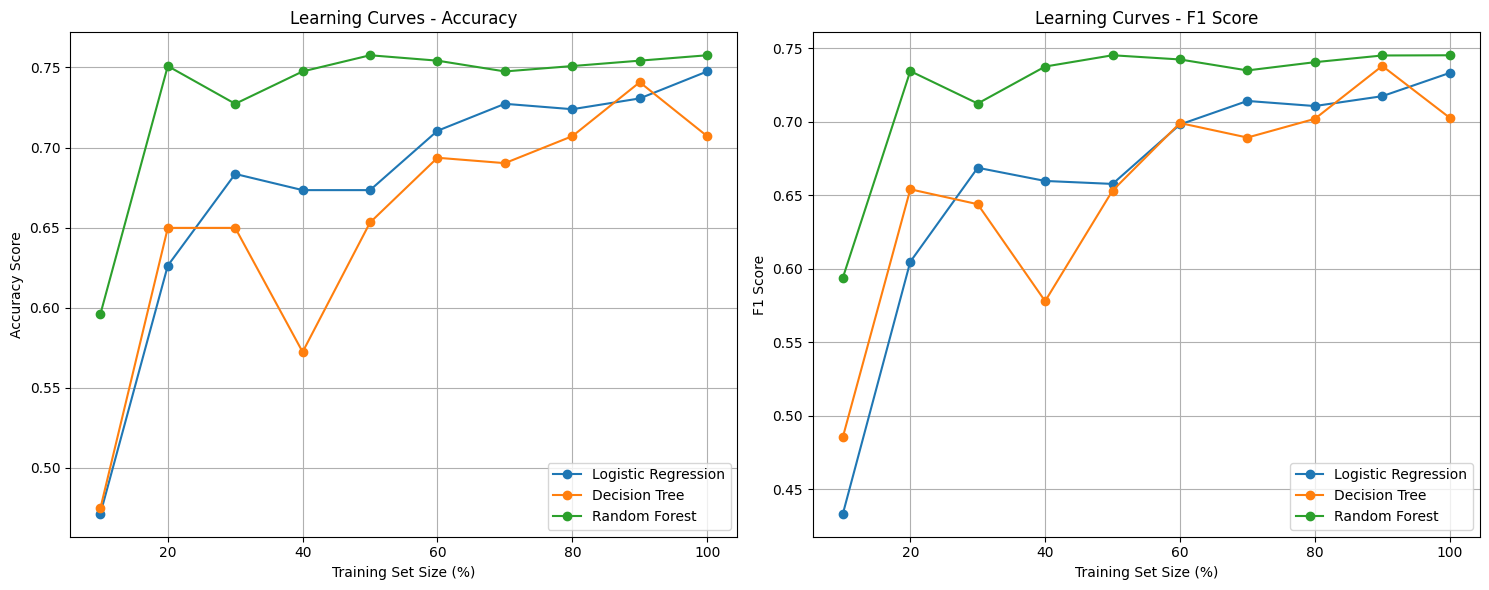

In [21]:
from sklearn.model_selection import train_test_split

def evaluate_model_on_subset(model, X_subset, y_subset, X_test, y_test):
    model.fit(X_subset, y_subset)
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='macro')
    }

# Create 10 parts
n_parts = 10
subset_sizes = np.linspace(0.1, 1.0, n_parts)
results = {
    'logistic_regression': {'accuracy': [], 'f1': []},
    'decision_tree': {'accuracy': [], 'f1': []},
    'random_forest': {'accuracy': [], 'f1': []}
}

# Initialize models with optimal parameters
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    **grid_search_pca.best_params_
)

dt_model = DecisionTreeClassifier(
    max_depth=optimal_depth,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=optimal_n_trees,
    random_state=42
)

# Evaluate models on different subset sizes
for subset_size in subset_sizes:
    n_samples = int(X_train.shape[0] * subset_size)
    X_subset = X_train[:n_samples]
    y_subset = y_train[:n_samples]

    # Evaluate each model
    for model_name, model in [
        ('logistic_regression', lr_model),
        ('decision_tree', dt_model),
        ('random_forest', rf_model)
    ]:
        scores = evaluate_model_on_subset(model, X_subset, y_subset, X_test, y_test)
        results[model_name]['accuracy'].append(scores['accuracy'])
        results[model_name]['f1'].append(scores['f1'])

# Plot learning curves
plt.figure(figsize=(15, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
for model_name in results:
    plt.plot(subset_sizes * 100, results[model_name]['accuracy'],
             label=model_name.replace('_', ' ').title(),
             marker='o')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves - Accuracy')
plt.legend()
plt.grid(True)

# F1 score subplot
plt.subplot(1, 2, 2)
for model_name in results:
    plt.plot(subset_sizes * 100, results[model_name]['f1'],
             label=model_name.replace('_', ' ').title(),
             marker='o')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score')
plt.title('Learning Curves - F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.


Results for 10 trees:
Accuracy: 0.7542
F1 Score: 0.7478

Results for 50 trees:
Accuracy: 0.7542
F1 Score: 0.7466

Results for 100 trees:
Accuracy: 0.7609
F1 Score: 0.7530

Results for 200 trees:
Accuracy: 0.7609
F1 Score: 0.7530


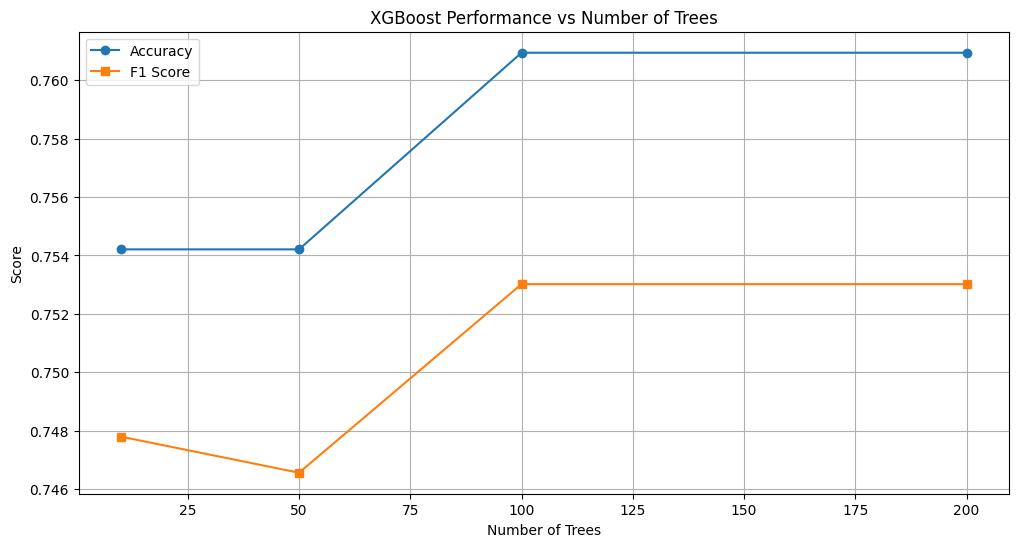

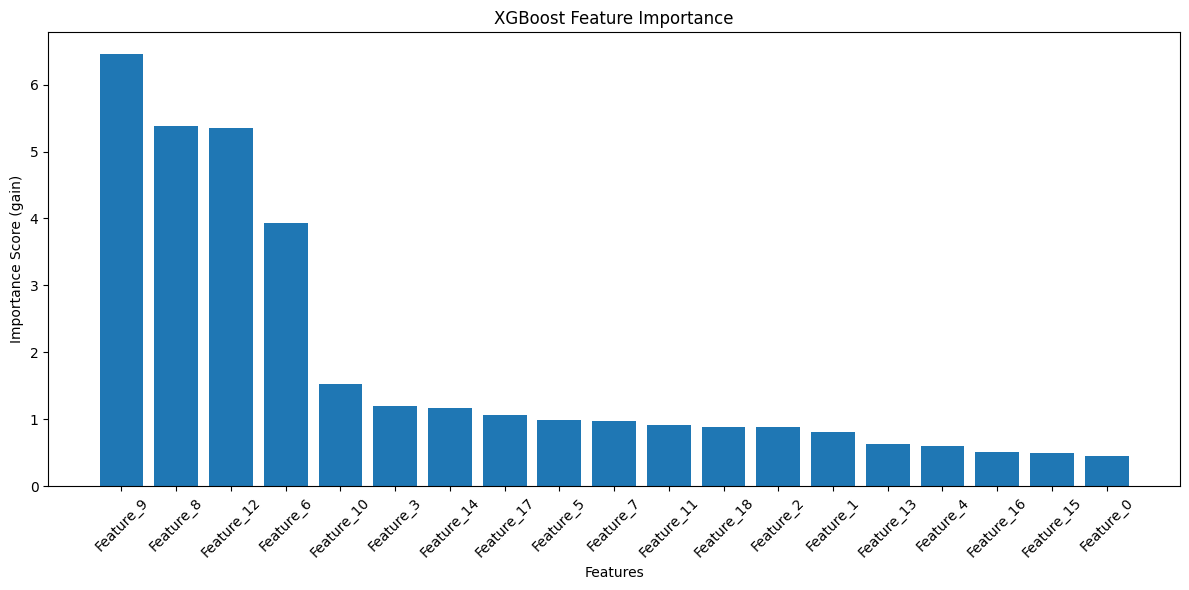


Final XGBoost Results:
Optimal number of trees: 100
Final Accuracy: 0.7576
Final F1 Score: 0.7497


In [20]:
# 2.9 Boosting with XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Convert data to DataFrame if it's not already
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Convert string labels to numeric if they're not already
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train_df, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_df, label=y_test_encoded)

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train_encoded)),
    'max_depth': 6,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss'
}

# List of numbers of trees to try
n_estimators_list = [10, 50, 100, 200]
results = []

# Train models with different numbers of trees
for n_estimators in n_estimators_list:
    # Train model
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=n_estimators,
        evals=[(dtrain, 'train'), (dtest, 'test')],
        early_stopping_rounds=10,
        verbose_eval=False
    )

    # Make predictions
    y_pred = model.predict(dtest)

    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='macro')

    results.append({
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1': f1
    })

    print(f"\nResults for {n_estimators} trees:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'],
         label='Accuracy', marker='o')
plt.plot(results_df['n_estimators'], results_df['f1'],
         label='F1 Score', marker='s')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('XGBoost Performance vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

# Train final model with optimal number of trees
optimal_n_trees = results_df.loc[results_df['f1'].idxmax(), 'n_estimators']
final_model = xgb.train(
    params,
    dtrain,
    num_boost_round=int(optimal_n_trees)
)

# Get feature importance
importance_scores = final_model.get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'feature': [f'Feature_{k}' for k in importance_scores.keys()],
     'importance': list(importance_scores.values())}
)
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance_df)), importance_df['importance'])
plt.xticks(range(len(importance_df)), importance_df['feature'], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score (gain)')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Print final results
print("\nFinal XGBoost Results:")
print(f"Optimal number of trees: {optimal_n_trees}")
y_pred_final = final_model.predict(dtest)
print(f"Final Accuracy: {accuracy_score(y_test_encoded, y_pred_final):.4f}")
print(f"Final F1 Score: {f1_score(y_test_encoded, y_pred_final, average='macro'):.4f}")
